# Linear Regression Bike Sharing Assignment

## Loading and Understanding the Data

In [1]:
# supressing warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# imporitng libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

In [3]:
# to display all set of columns in a dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# reading the data from csv file
df_bikesharing = pd.read_csv('day.csv')

In [5]:
# checking first few rows
df_bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# checking the shape of the data
df_bikesharing.shape

(730, 16)

In [7]:
# checking the size of the data
df_bikesharing.size

11680

In [8]:
# checking the description of the data
df_bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# checking the info of the data
df_bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Cleaning

In [10]:
# checking the null/missing values in the data
df_bikesharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in any of the columns.

In [11]:
# checking the number of duplicates
# finding any duplicate rows in the dataset
print('Number of duplicates:',df_bikesharing.duplicated().sum())

Number of duplicates: 0


There are no duplicates in the data.

In [12]:
# dropping instant column as it is an index column which will not help us in prediction and anlysis as well
df_bikesharing.drop(['instant'], axis = 1, inplace = True)

# dropping dteday as we already have month and weekday columns
df_bikesharing.drop(['dteday'], axis = 1, inplace = True)

# dropping casual and registered columns as we have cnt column which is sum of the both 
# cnt(count) is the target column
df_bikesharing.drop(['casual'], axis = 1, inplace = True)
df_bikesharing.drop(['registered'], axis = 1, inplace = True)

In [13]:
# renaming few columns for better understanding
df_bikesharing.rename(columns={'yr':'year','mnth':'month','hum':'humidity', 'temp': 'temperature','atemp':'atemperature', 'cnt':'count'}, inplace=True)

In [14]:
# checking data frame head after dropping
df_bikesharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemperature,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# printing number of unique values in all columns
df_bikesharing.nunique()

season            4
year              2
month            12
holiday           2
weekday           7
workingday        2
weathersit        3
temperature     498
atemperature    689
humidity        594
windspeed       649
count           695
dtype: int64

In [16]:
# mapping season, month, weekday and weathersit to categorical types as suggested and provided in the data dictionary
df_bikesharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df_bikesharing.weathersit.replace({1:'clear',2:'mist_cloudy',3:'light snow & rain',4:'heavy snow & rain'},inplace = True)

df_bikesharing.month.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace = True)

df_bikesharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace = True)

df_bikesharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemperature,humidity,windspeed,count
0,spring,0,jan,0,sat,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Exploratory Data Analysis

In [17]:
# handle outliers
df_bikesharing.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temperature', 'atemperature', 'humidity', 'windspeed',
       'count'],
      dtype='object')

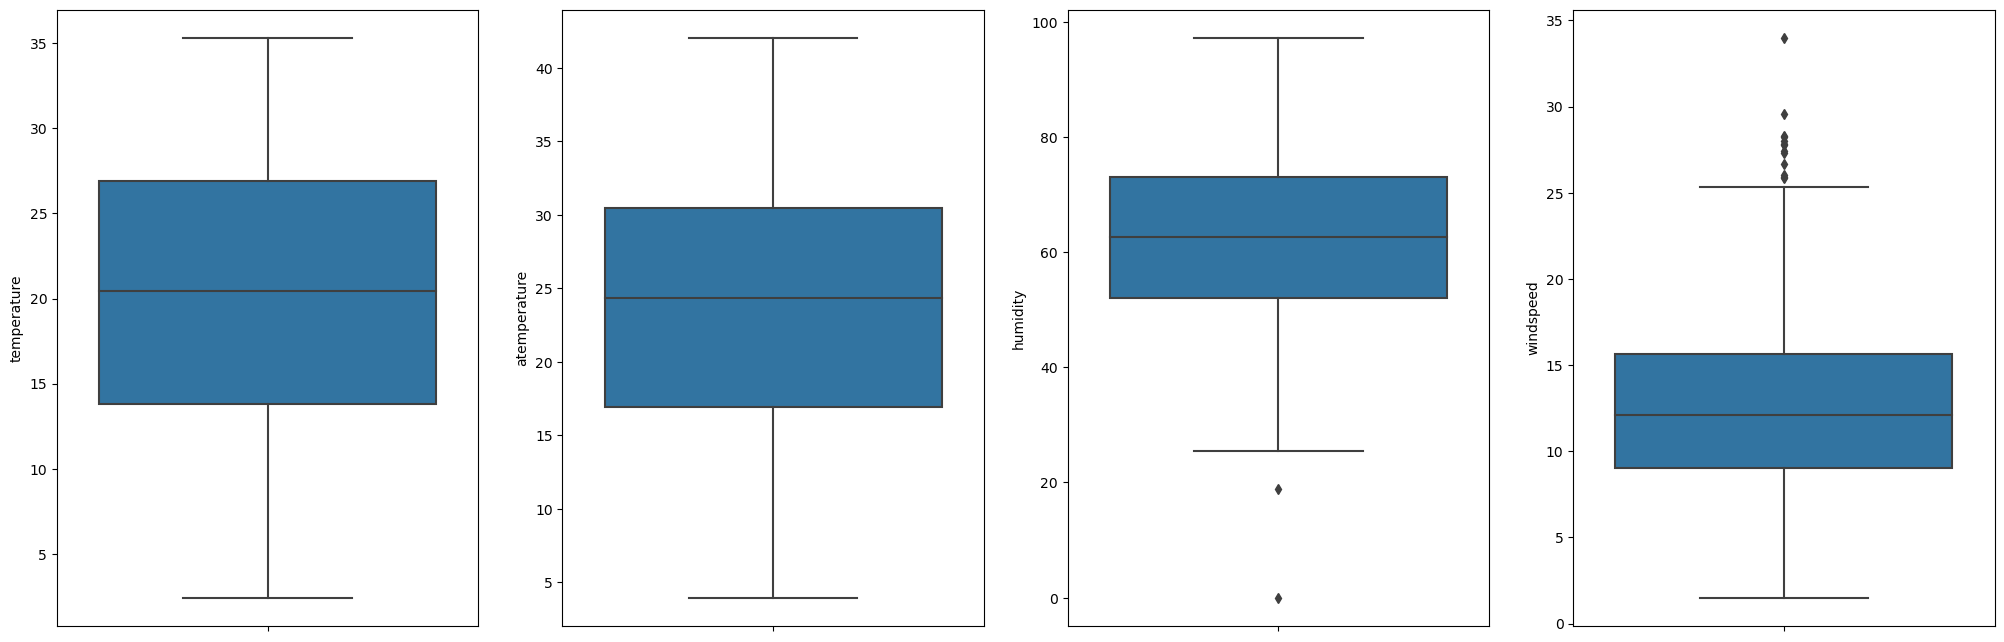

In [18]:
# visualizing box plots for independent numerical variables
cols = ['temperature', 'atemperature', 'humidity', 'windspeed']
plt.figure(figsize=(25,8))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df_bikesharing)
    i+=1

From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

<Figure size 1500x3000 with 0 Axes>

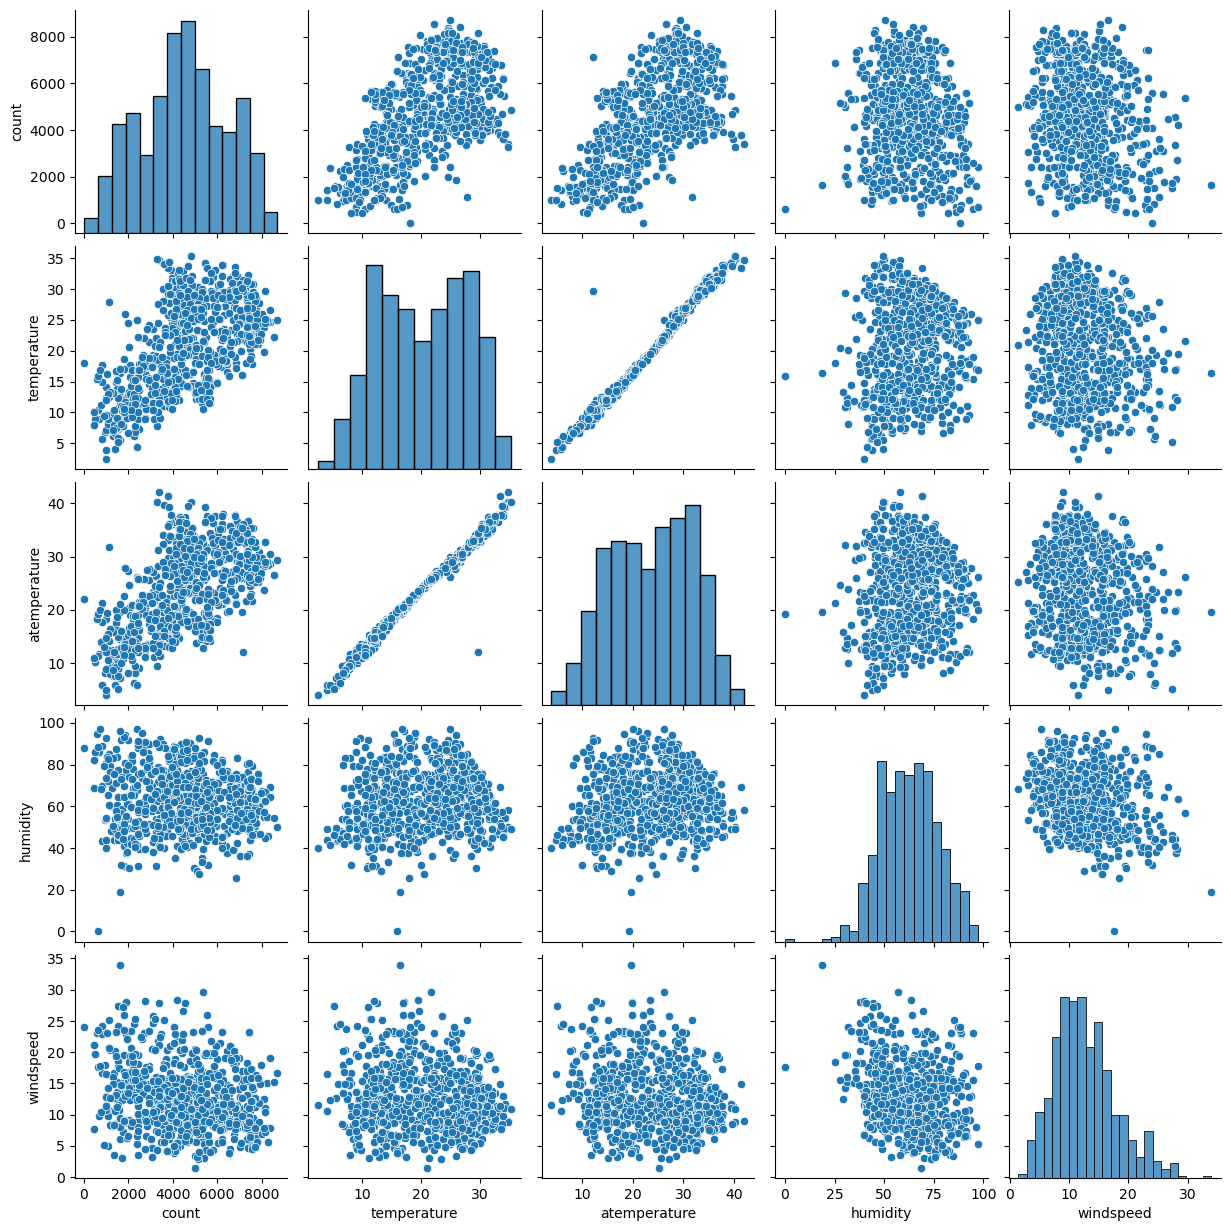

In [19]:
# visualizing continuous numerical variables using pairplots
plt.figure(figsize = (15,30))
sns.pairplot(data=df_bikesharing,vars=['count', 'temperature', 'atemperature', 'humidity','windspeed'])
plt.show()

- Temperature and atemperature are highly correlated with each other
- By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemperature , temperature etc. that show a positive correlation with the target variable count .

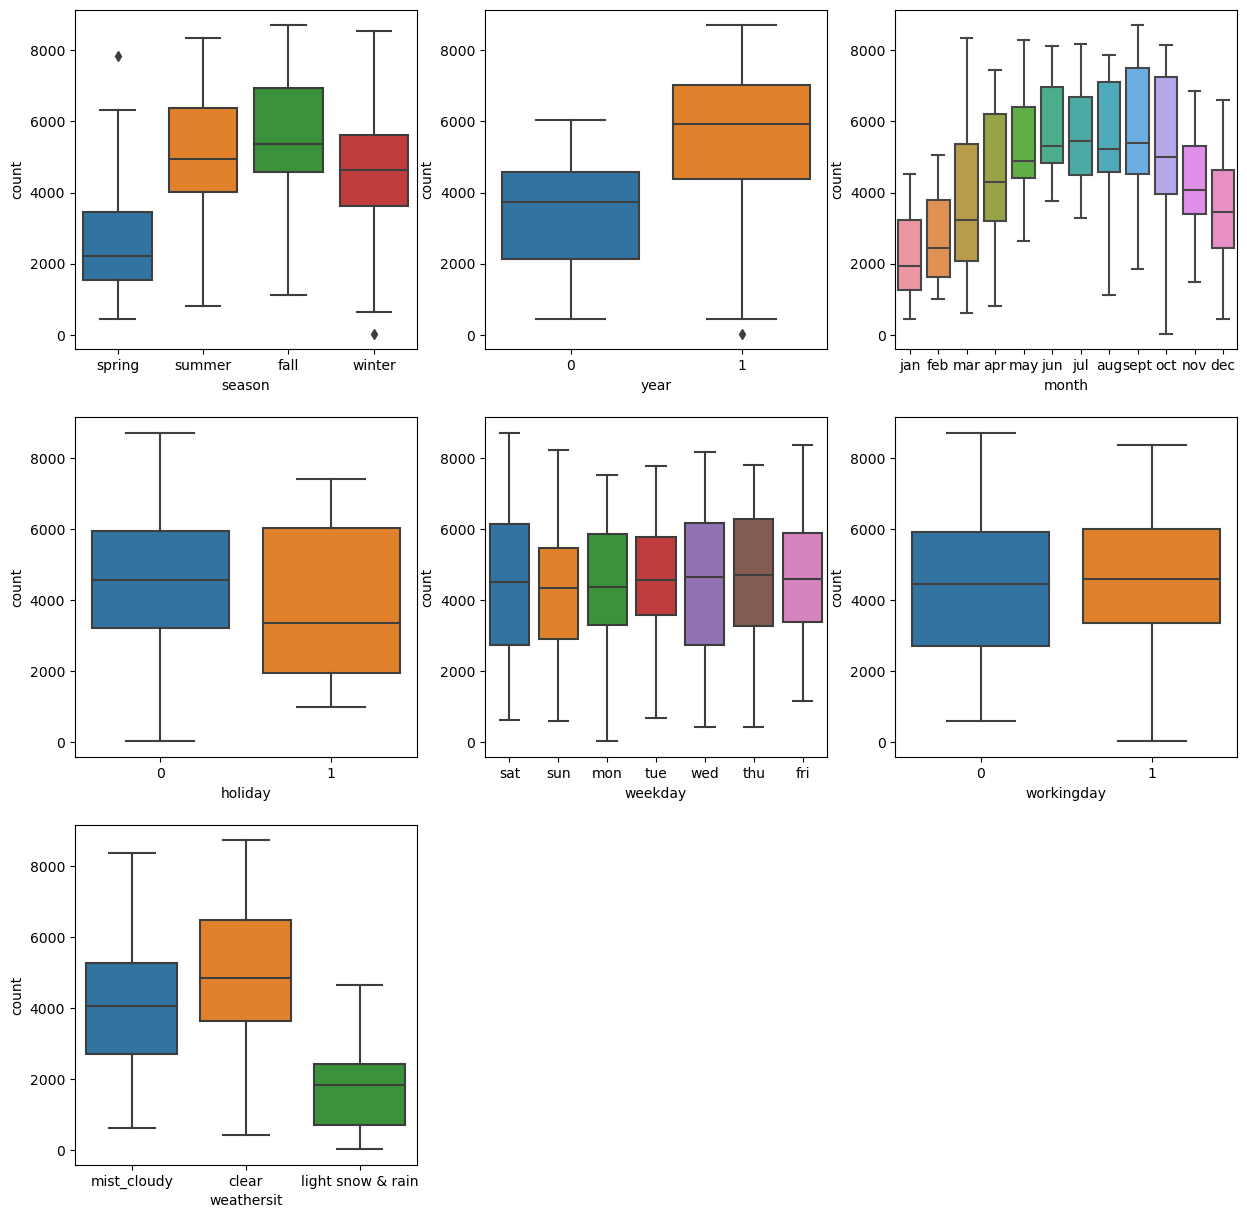

In [20]:
# analysing categorical Variabels with target variables using boxplot analysis
# to visualize how predictor variable stands against the target variable
vars_cat = ['season','year','month','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df_bikesharing, x=i[1], y='count')
plt.show()

- Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019. 
- Most of the bookings has been done during the month of May, June, July, Aug, Sept and Oct. Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. 
- There are no users when there is heavy rain/ snow indicating that this weather is extremely unfavorable. Highest count was seen when the weathersit was’ Clear, Partly Cloudy’. 
- Thu, Fir, Sat and Sun have a greater number of bookings as compared to the start of the week. 
- When it’s a holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family. 
- Booking seemed to be almost equal either on working day or non-working day. 
- 2019 attracted a greater number of booking from the previous year, which shows good progress in terms of business. 

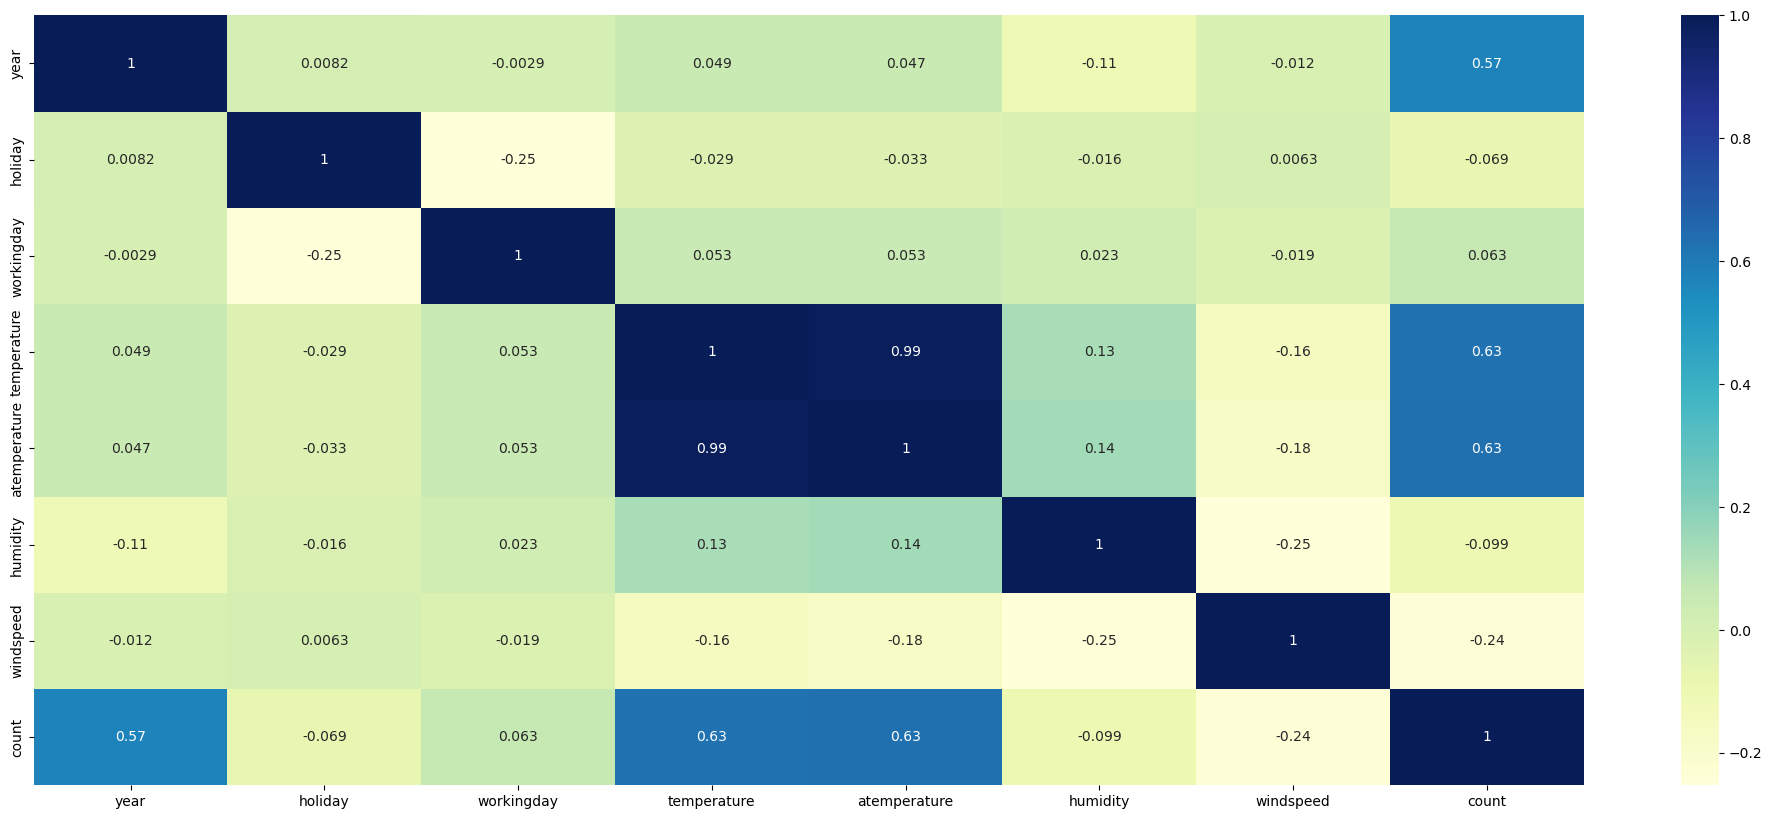

In [21]:
# visualising the data to find the correlation between the numerical variables
# checking continuous variables relationship with each other
cor=df_bikesharing.corr()
plt.figure(figsize=(25,10))
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

- We can see that temperature and atemperature are highly correlated. However let's drop it based on the Variance Inflation Factor later during the model building. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables.
- We also see Target variable has a linear relationship with some of the  indeptendent variables like temperature, year & atemperature. Good sign for building a linear regression Model.

In [22]:
# function to create regression plot for numerical variables
def reg_plot(data, column):
    plt.figure(figsize=(6,5),dpi=110)
    plt.title("Count vs " + column,fontsize=16)
    sns.regplot(data=data,y="count",x=column)
    plt.xlabel("")
    plt.show()

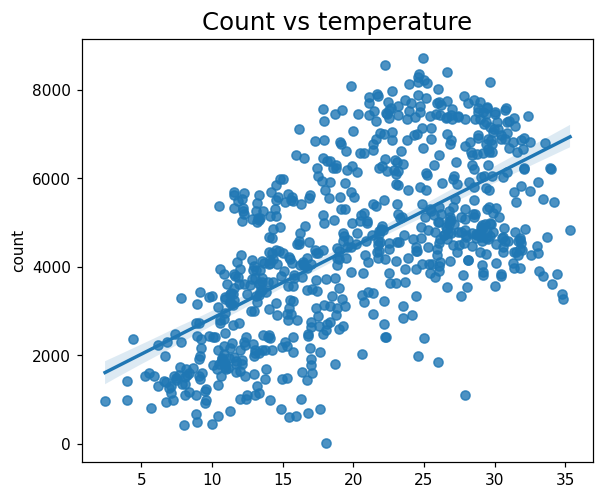

In [23]:
# regression plot for temperature
reg_plot(df_bikesharing, 'temperature')

- Demand for bikes is positively correlated to temperature.
- We can see that count is linearly increasing with temp indicating linear relation.

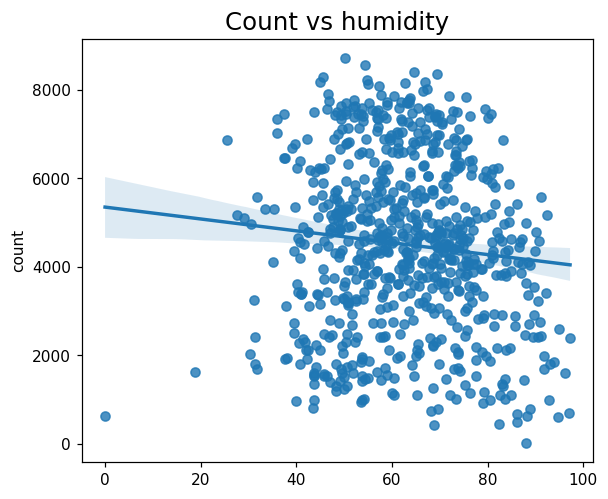

In [24]:
# regression plot for humidity
reg_plot(df_bikesharing, 'humidity')

- Humidity values are more scattered around.
- Although we can see count decreasing with increase in humidity.

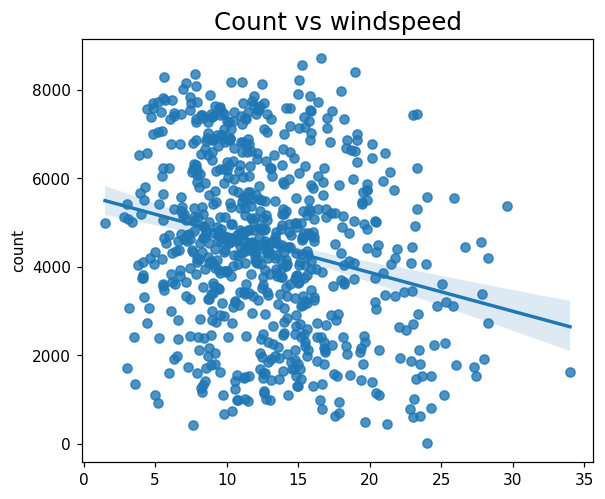

In [25]:
# regression plot for windspeed
reg_plot(df_bikesharing, 'windspeed')

- Windspeed is values are more scattered around.
- Although we can see count decreasing with increase in windspeed.

In [26]:
# function to create barplot for categorical variables
def plot_cat_columns(data, column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'count',data=data)
    plt.subplot(1,2,2)
    sns.barplot(column,'count',data=data, hue='year',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    plt.show()

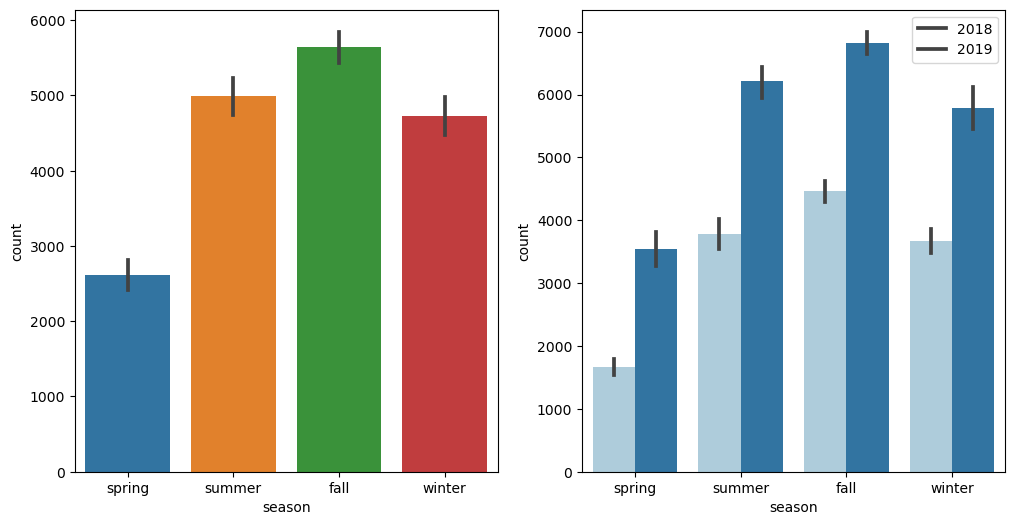

In [27]:
# plotting visualization for season column
plot_cat_columns(df_bikesharing, 'season')

Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

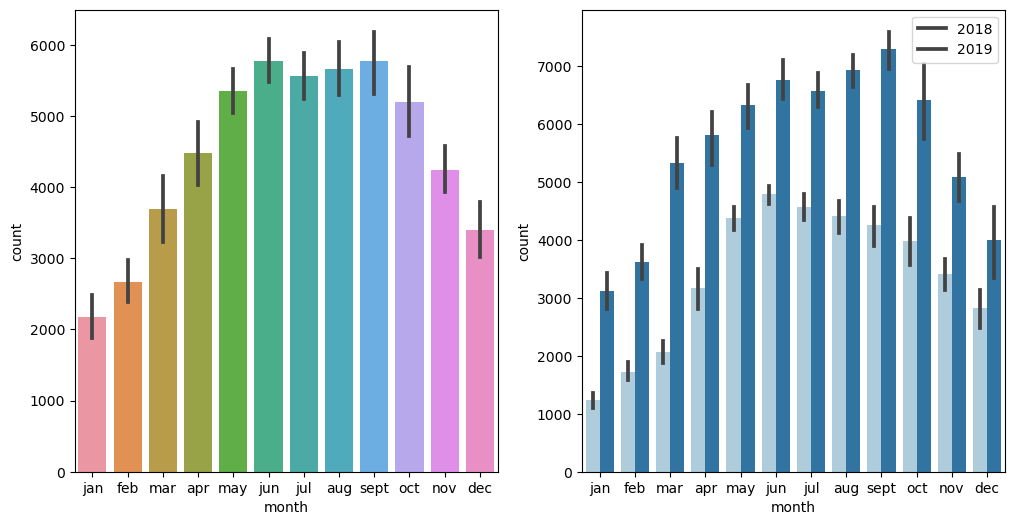

In [28]:
# plotting visualization for month column
plot_cat_columns(df_bikesharing, 'month')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

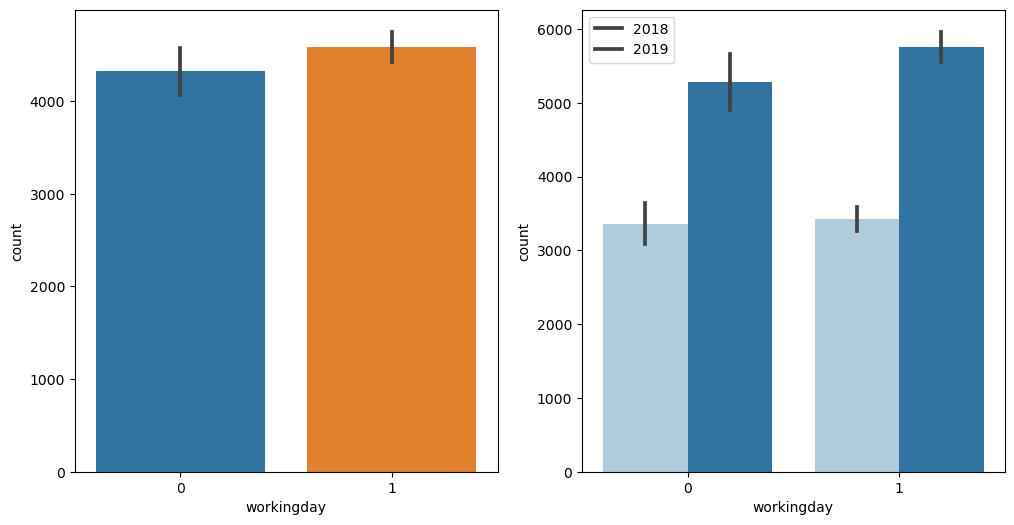

In [29]:
# plotting visualization for workingday column
plot_cat_columns(df_bikesharing, 'workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

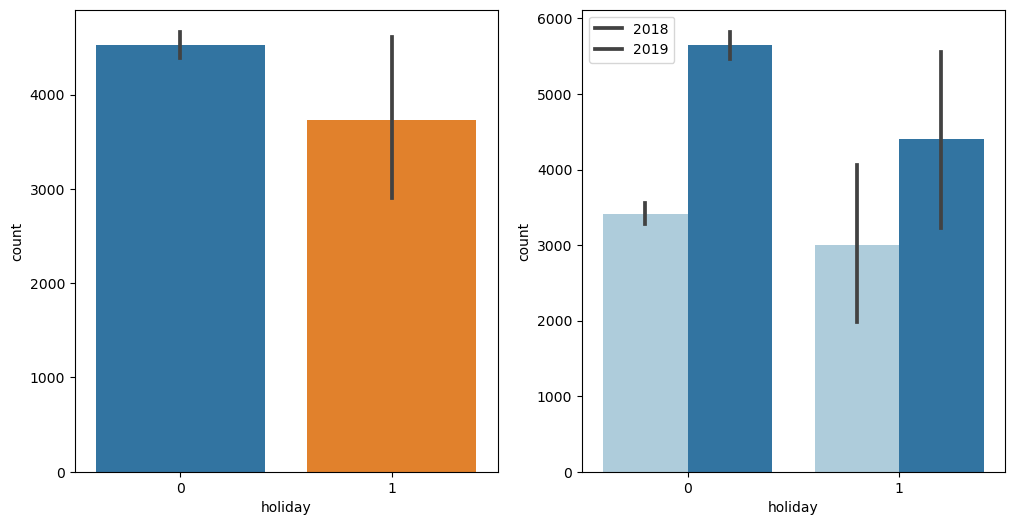

In [30]:
# plotting visualization for holiday column
plot_cat_columns(df_bikesharing, 'holiday')

When its holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

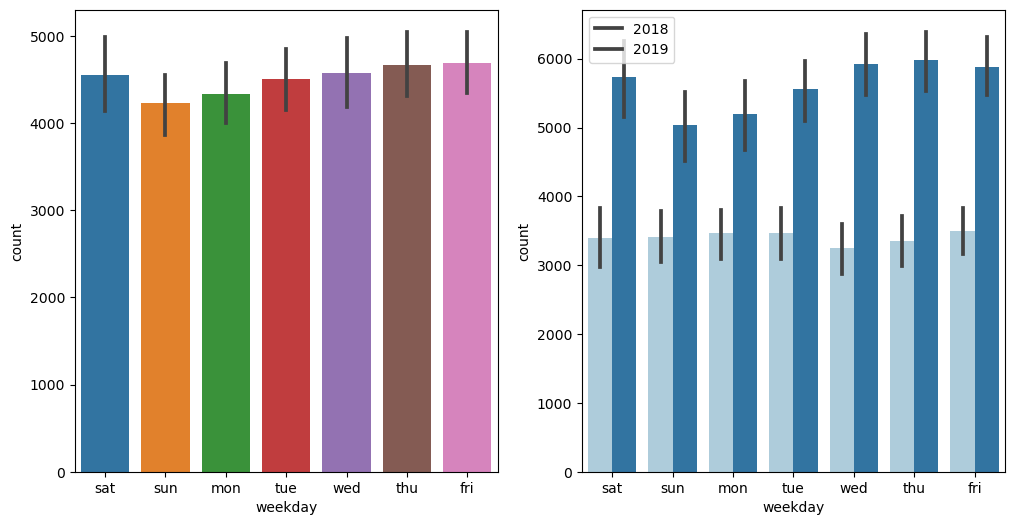

In [31]:
# plotting visualization for weekday column
plot_cat_columns(df_bikesharing, 'weekday')

Thu, Fri, Sat and Sun have more number of bookings as compared to the start of the week.

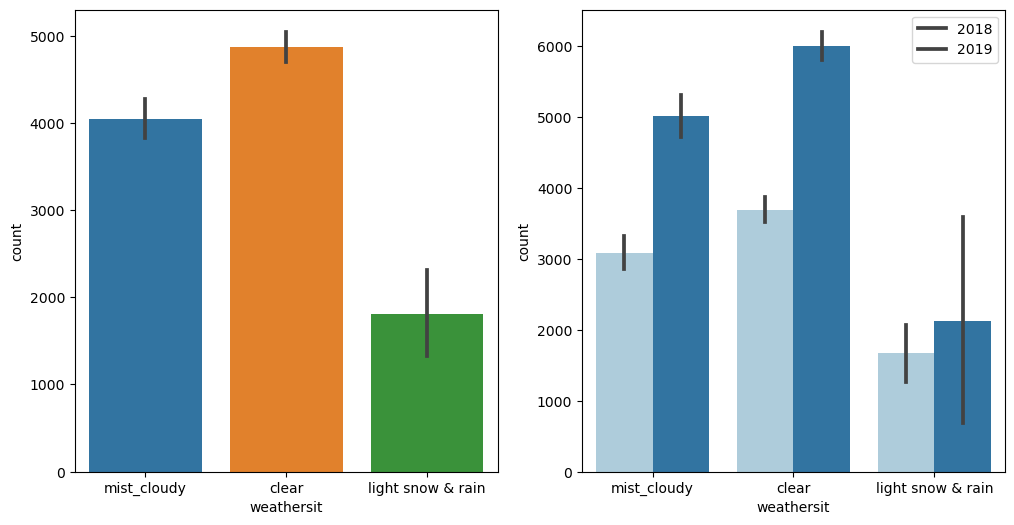

In [32]:
# plotting visualization for weathersit column
plot_cat_columns(df_bikesharing, 'weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

## Data Preparation for Linear Regression 

In [33]:
# creating dummy variables for the variables of month, weekday, weathersit & seasons
df_bikesharing = pd.get_dummies(data=df_bikesharing,columns=['season','month','weekday','weathersit'],drop_first=True)

In [34]:
# printing columns after creating dummies
df_bikesharing.columns

Index(['year', 'holiday', 'workingday', 'temperature', 'atemperature',
       'humidity', 'windspeed', 'count', 'season_spring', 'season_summer',
       'season_winter', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_light snow & rain', 'weathersit_mist_cloudy'],
      dtype='object')

In [35]:
# printing few rows to check
df_bikesharing.head()

,year,holiday,workingday,temperature,atemperature,humidity,windspeed,count,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow & rain,weathersit_mist_cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
# checking shape before splitting
df_bikesharing.shape

(730, 30)

In [37]:
# splitting the dataset into train and test sets
df_train, df_test = train_test_split(df_bikesharing, train_size=0.7, random_state=42)

In [38]:
# checking shape of the training data
df_train.shape

(510, 30)

In [39]:
# checking shape of the testing data
df_test.shape

(220, 30)

In [40]:
# to make all features in same scale to interpret easily
# let us scale continuous variables using min max scaler
num_vars = ['temperature','atemperature','humidity','windspeed', 'count']

# using MinMaxScaler scaler to scale
scaler = MinMaxScaler()

# fit and transform training set
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [41]:
# checking description for training set after scaling
df_train.describe()

,year,holiday,workingday,temperature,atemperature,humidity,windspeed,count,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow & rain,weathersit_mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.519608,0.027451,0.668627,0.551313,0.526919,0.654203,0.415045,0.497429,0.231373,0.258824,0.24902,0.074510,0.074510,0.074510,0.088235,0.092157,0.084314,0.062745,0.092157,0.090196,0.090196,0.090196,0.149020,0.150980,0.152941,0.145098,0.131373,0.141176,0.029412,0.345098
std,0.500106,0.163554,0.471169,0.227237,0.212992,0.143788,0.185760,0.234207,0.422124,0.438419,0.43287,0.262857,0.262857,0.262857,0.283915,0.289531,0.278131,0.242742,0.289531,0.286744,0.286744,0.286744,0.356457,0.358381,0.360284,0.352545,0.338139,0.348545,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354526,0.354454,0.544033,0.281934,0.344772,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.660798,0.384737,0.501871,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756977,0.526489,0.677080,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# checking head of the training data after scaling
df_train.head()

,year,holiday,workingday,temperature,atemperature,humidity,windspeed,count,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow & rain,weathersit_mist_cloudy
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0.439696,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


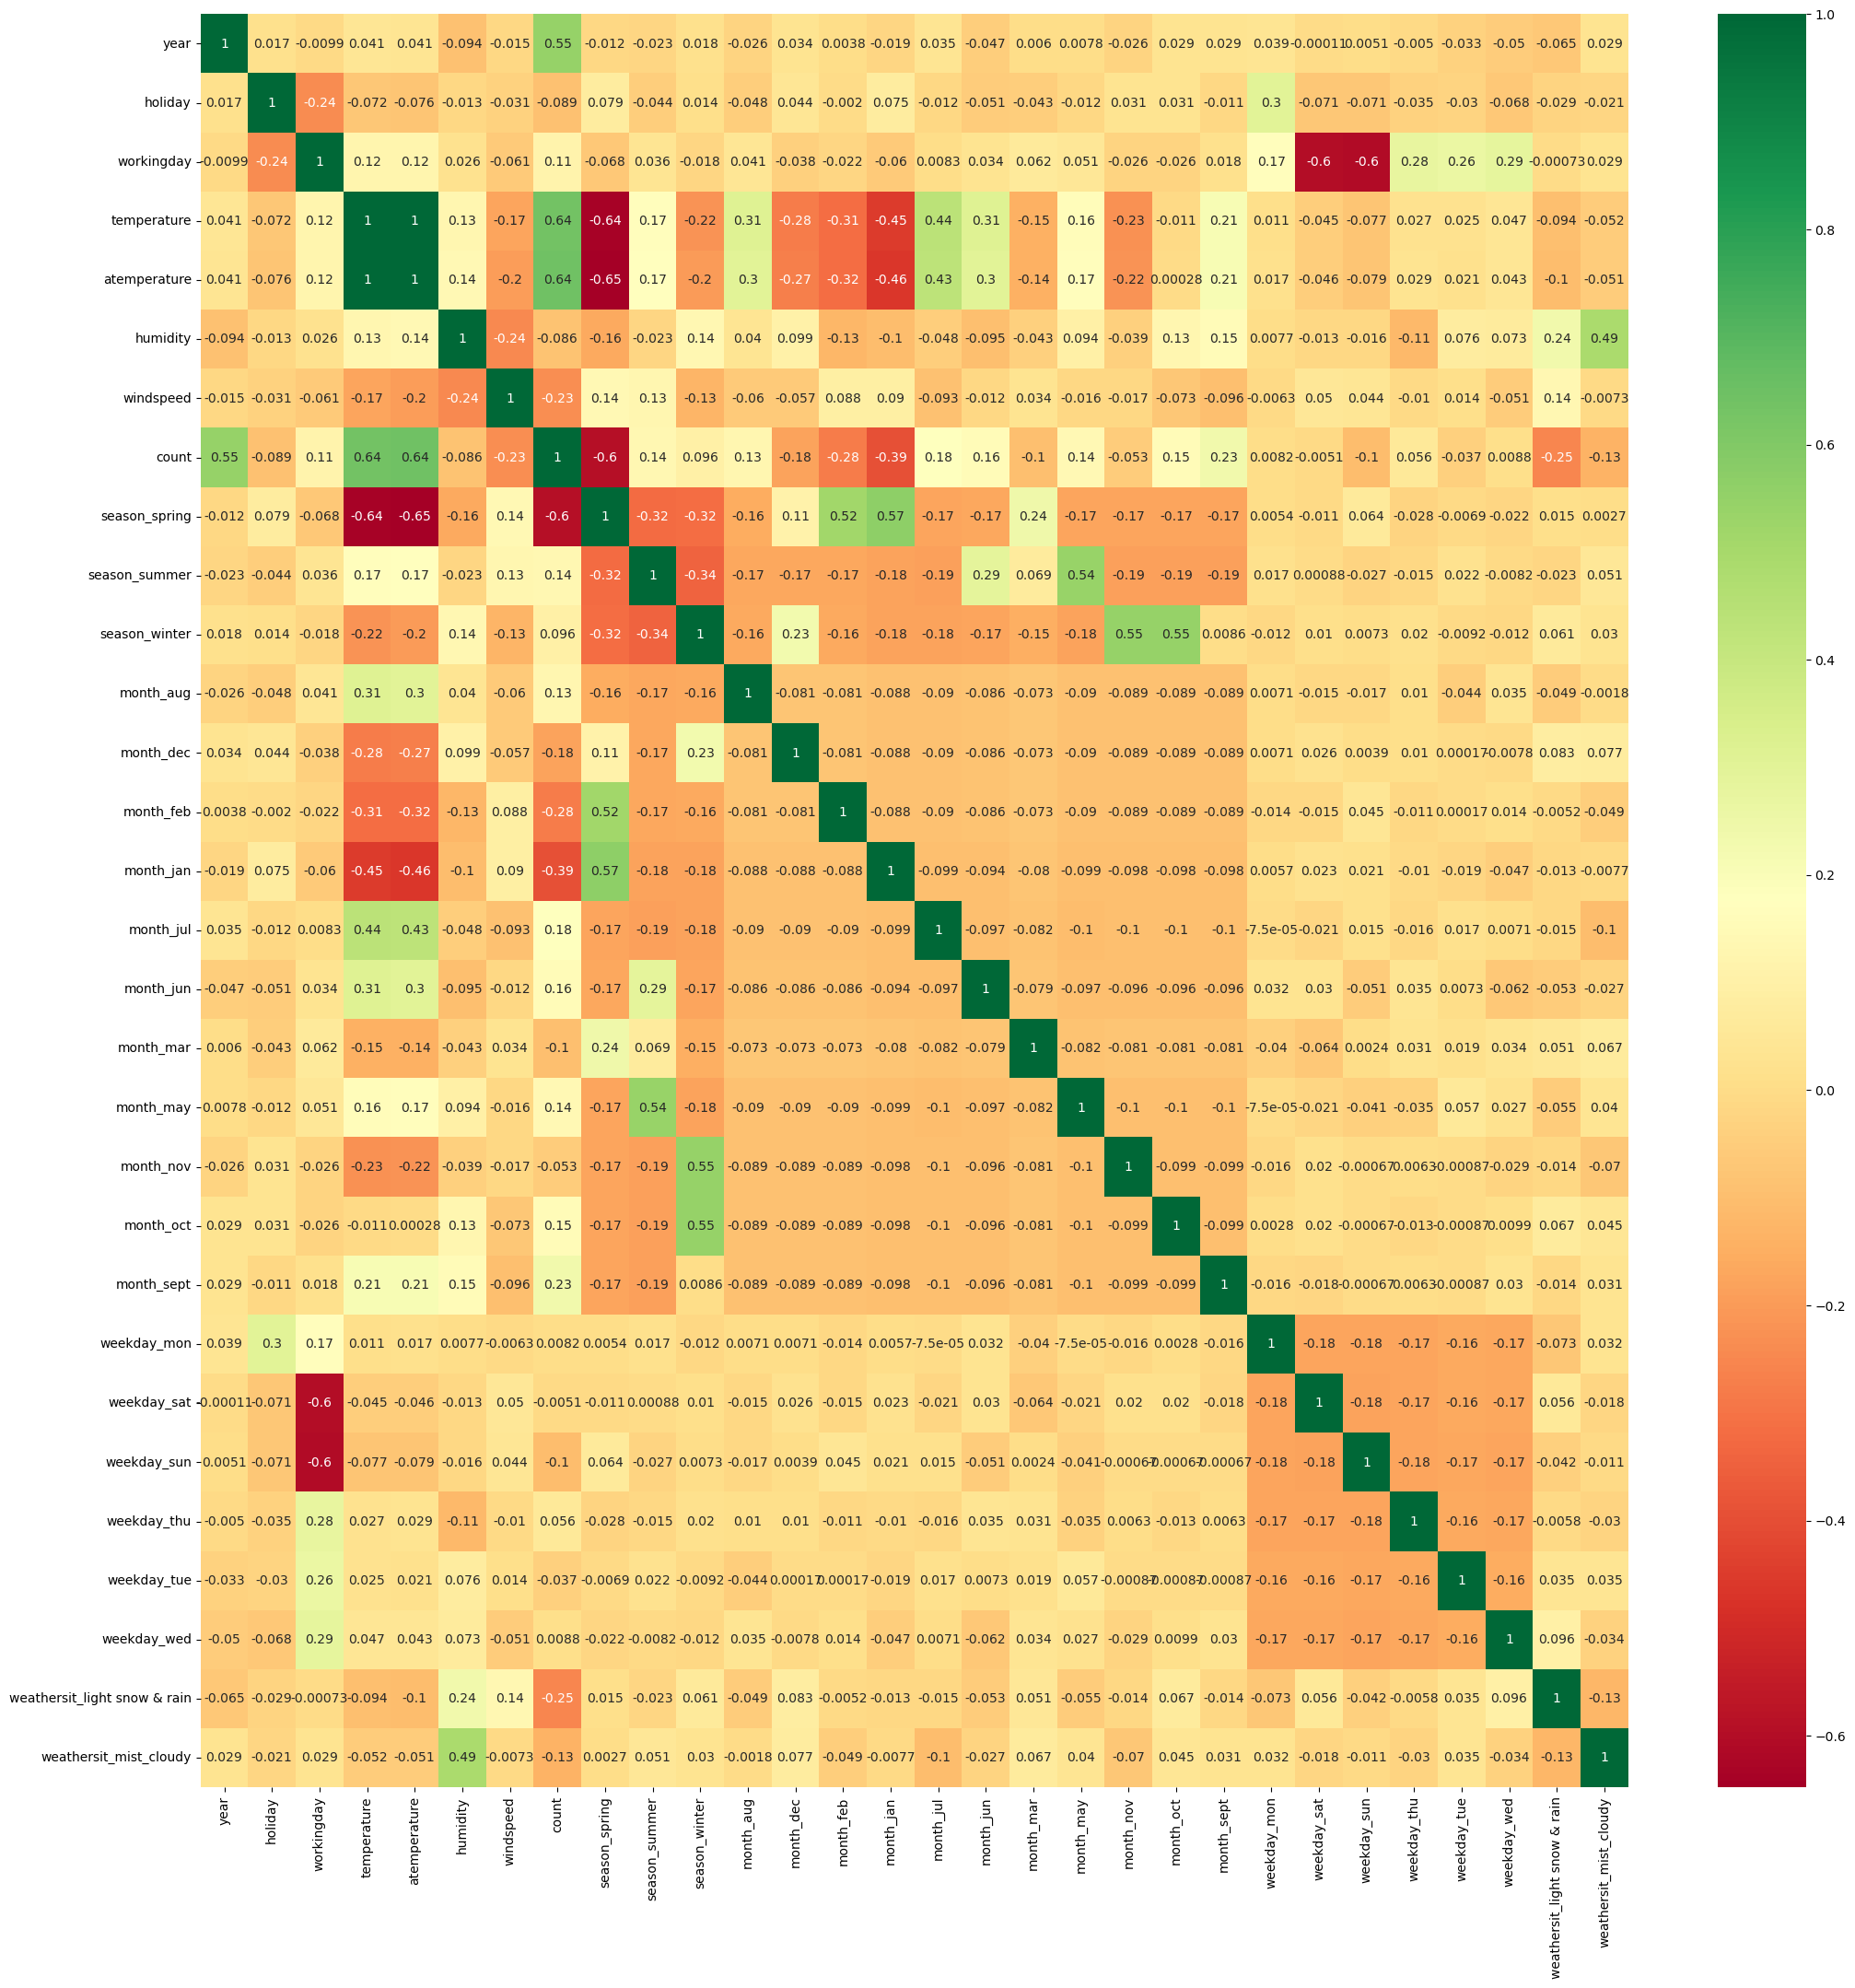

In [43]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

Misty_cloudy and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

## Model Building

Feature Selection Using RFE

In [44]:
# building the Linear Model
# selecting the target/dependent variable y
y_train = df_train.pop('count')
# remaning variables as independent variable
X_train = df_train

In [45]:
# building a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
# cutting down number of features to 15(important features) using recursive feature elimination
rfe = RFE(lr, n_features_to_select = 15)
rfe = rfe.fit(X_train,y_train)

In [47]:
# columns selected using RFE and their ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 2),
 ('temperature', True, 1),
 ('atemperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('month_aug', False, 6),
 ('month_dec', True, 1),
 ('month_feb', False, 8),
 ('month_jan', False, 14),
 ('month_jul', True, 1),
 ('month_jun', False, 15),
 ('month_mar', True, 1),
 ('month_may', False, 4),
 ('month_nov', True, 1),
 ('month_oct', False, 5),
 ('month_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 12),
 ('weathersit_light snow & rain', True, 1),
 ('weathersit_mist_cloudy', True, 1)]

In [48]:
# filtering the data for only selected best features extracted using rfe
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe

,year,temperature,atemperature,humidity,windspeed,season_spring,season_winter,month_dec,month_jul,month_mar,month_nov,month_sept,weekday_sat,weathersit_light snow & rain,weathersit_mist_cloudy
645,1,0.403972,0.404998,0.731215,0.419004,0,1,0,0,0,0,0,0,0,1
163,0,0.717562,0.685963,0.509660,0.708724,0,0,0,0,0,0,0,0,0,0
360,0,0.331287,0.326273,0.785745,0.415925,1,0,1,0,0,0,0,0,0,1
640,1,0.745598,0.682653,0.817947,0.110593,0,1,0,0,0,0,0,0,0,1
625,1,0.703024,0.637937,0.899098,0.839562,0,0,0,0,0,0,1,0,0,1
711,1,0.294943,0.282372,0.500644,0.380056,0,1,1,0,0,0,0,0,0,0
311,0,0.435124,0.437339,0.743667,0.116833,0,1,0,0,0,1,0,0,0,0
333,0,0.331287,0.304730,0.632030,0.623084,0,1,0,0,0,1,0,0,0,0
456,1,0.466998,0.457379,0.519723,0.725728,0,0,0,0,0,0,0,0,0,0
104,0,0.482890,0.476281,0.691713,0.510916,0,0,0,0,0,0,0,0,0,0


In [49]:
# checking those columns whicn are not selected
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'month_aug', 'month_feb',
       'month_jan', 'month_jun', 'month_may', 'month_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [50]:
# checking shape of new data with rfe selected columns
X_train_rfe.shape

(510, 15)

In [51]:
# checking head of new data with rfe selected columns
X_train_rfe.head()

,year,temperature,atemperature,humidity,windspeed,season_spring,season_winter,month_dec,month_jul,month_mar,month_nov,month_sept,weekday_sat,weathersit_light snow & rain,weathersit_mist_cloudy
645,1,0.403972,0.404998,0.731215,0.419004,0,1,0,0,0,0,0,0,0,1
163,0,0.717562,0.685963,0.509660,0.708724,0,0,0,0,0,0,0,0,0,0
360,0,0.331287,0.326273,0.785745,0.415925,1,0,1,0,0,0,0,0,0,1
640,1,0.745598,0.682653,0.817947,0.110593,0,1,0,0,0,0,0,0,0,1
625,1,0.703024,0.637937,0.899098,0.839562,0,0,0,0,0,0,1,0,0,1


Model 1 - Start with all variables selected by RFE

In [52]:
# function to build a model using statsmodel api by providing the data
def build_model(df):
    X_train_sm = sm.add_constant(df)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [53]:
# function to calculate VIFs for columns in a data and printing them
def get_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [54]:
# building model for all columns selected by RFE
build_model(X_train_rfe)
# printing vif values for all columns selected by RFE
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.07e-184
Time:                        12:01:59   Log-Likelihood:                 482.58
No. Observations:                 510   AIC:                            -933.2
Df Residuals:                     494   BIC:                            -865.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Model 2

In [55]:
# dropping atemperature as it is very highly correlated with temperature and has high P value
X_train_rfe = X_train_rfe.drop(['atemperature'], axis = 1)
build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.34e-185
Time:                        12:01:59   Log-Likelihood:                 481.07
No. Observations:                 510   AIC:                            -932.1
Df Residuals:                     495   BIC:                            -868.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Model 3

In [56]:
# dropping weekday_sat as it has high P value
X_train_rfe = X_train_rfe.drop(['weekday_sat'], axis = 1)
build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.1
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          7.00e-186
Time:                        12:01:59   Log-Likelihood:                 479.93
No. Observations:                 510   AIC:                            -931.9
Df Residuals:                     496   BIC:                            -872.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Model 4

In [57]:
# dropping humidity as it has very high VIF value
X_train_rfe = X_train_rfe.drop(['humidity'], axis = 1)
build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.1
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.04e-183
Time:                        12:01:59   Log-Likelihood:                 472.00
No. Observations:                 510   AIC:                            -918.0
Df Residuals:                     497   BIC:                            -863.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

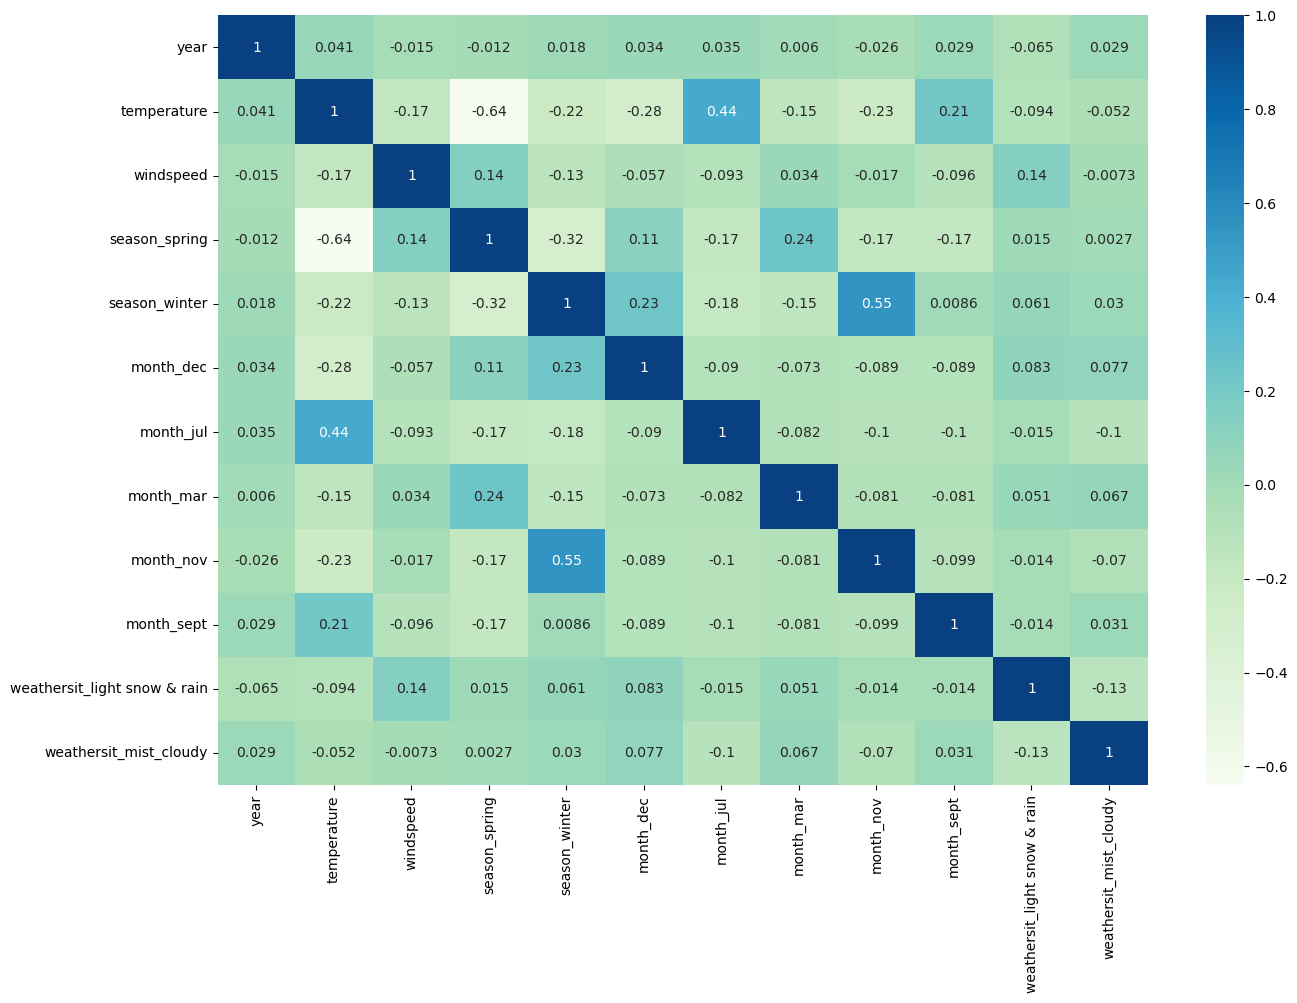

In [58]:
# checking correlation of features selected by RFE 
plt.figure(figsize = (15,10))
sns.heatmap(X_train_rfe.corr(), cmap='GnBu', annot=True)
plt.show()

- Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.832
- Let us select Model 4 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
- Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.
- F-Statistics value of 205 (which is greater than 1) and the p-value of 1.04e-183 i.e almost equals to zero, states that the overall model is significant

In [59]:
# checking head of the data after dropping few features
X_train_rfe.head()

,year,temperature,windspeed,season_spring,season_winter,month_dec,month_jul,month_mar,month_nov,month_sept,weathersit_light snow & rain,weathersit_mist_cloudy
645,1,0.403972,0.419004,0,1,0,0,0,0,0,0,1
163,0,0.717562,0.708724,0,0,0,0,0,0,0,0,0
360,0,0.331287,0.415925,1,0,1,0,0,0,0,0,1
640,1,0.745598,0.110593,0,1,0,0,0,0,0,0,1
625,1,0.703024,0.839562,0,0,0,0,0,0,1,0,1


In [60]:
# let us build the final model using the latest data
# building a model
lr_new = LinearRegression()
lr = lr_new.fit(X_train_rfe,y_train)
# pring the coeffecients and intercept values
print(lr.intercept_,lr.coef_)

0.24732123755735774 [ 0.24141554  0.41224283 -0.09360824 -0.16425492  0.08545385 -0.06746835
 -0.05432919  0.0573106  -0.08526062  0.04741427 -0.27063361 -0.08467557]


## Model Evaluation 

So, now to check if the error terms are normally distributed (which is one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [61]:
# predicting the values using the training data
y_train_pred = lr.predict(X_train_rfe)

In [62]:
# plotting a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

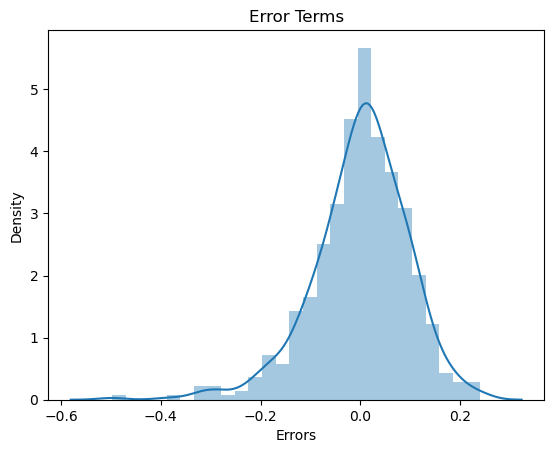

In [63]:
# plotting a histogram of training error
plot_res_dist(y_train, y_train_pred)

We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

Cross-verifying the above conclusion using a qq-plot as well

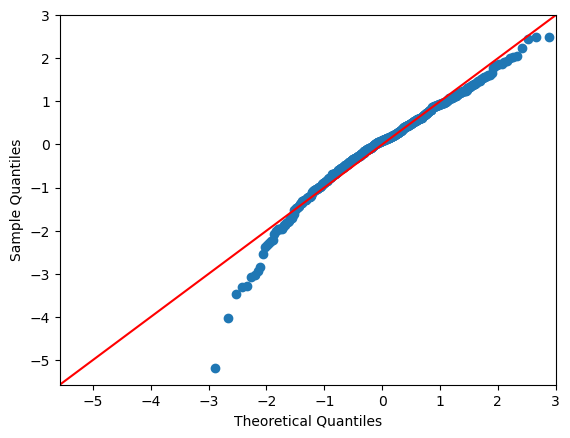

In [64]:
# plotting the qq-plot of the error terms
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed.

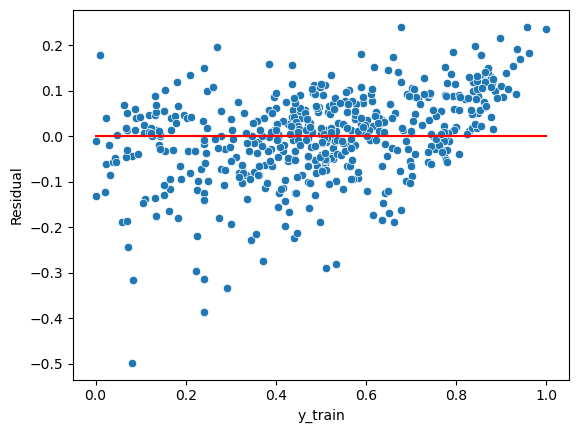

In [65]:
# homoscedasicity
# linearity check
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('y_train')
plt.ylabel('Residual')
plt.show()

As we have observed earlier, temperature has a linear relationship with the dependent variable count(cnt).As we have observed earlier every variable in our chosen model has a VIF<6 is  which ensures that there is no mulitcollinearity.

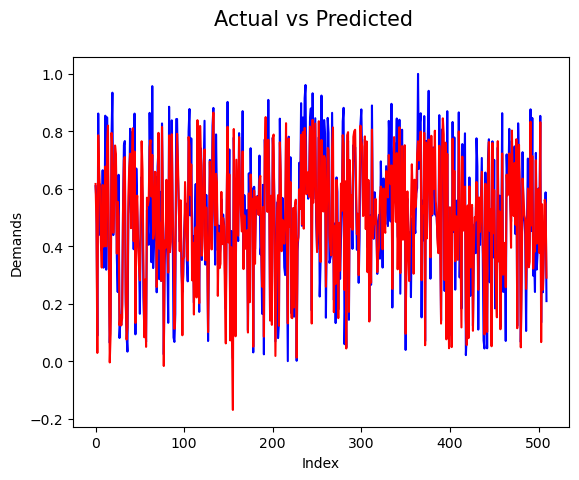

In [66]:
# actual vs predicted
c = [i for i in range(0,len(X_train_rfe),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model seems ok.

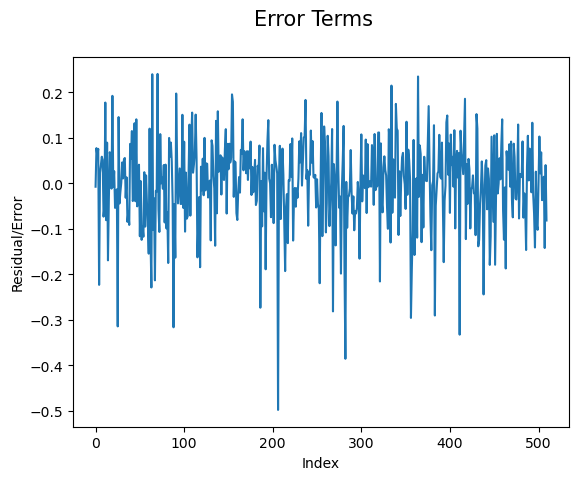

In [67]:
# error Terms
c = [i for i in range(0,len(X_train_rfe),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Residual/Error')
plt.show()

Here,If we see the error terms are independent of each other.

In [68]:
# printing R-squared value for training data
r2_train = r2_score(y_train,y_train_pred)
r2_train

0.8319996592253112

In [69]:
# calculating adjusted-R^2 value for the training data

adjusted_r2 = round(1-(1-r2_train)*(X_train_rfe.shape[0]-1)/(X_train_rfe.shape[0]-X_train_rfe.shape[1]-1),4)
print(adjusted_r2)

0.8279


R2 Same as we obtained for our final model

## Predicting values on test data

In [70]:
# scaling variables in test data
num_vars = ['temperature','atemperature','humidity','windspeed', 'count']

# test data to be transformed
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [71]:
# selecting the target/dependent variable y
y_test = df_test.pop('count')
# remaning variables as independent variable
X_test = df_test

In [72]:
# predicting the values for test data only considering the final column use for training the model
y_pred = lr.predict(X_test[X_train_rfe.columns])

In [73]:
# finding out the R squared value between actual test and predicted test data 
r2_test = r2_score(y_test,y_pred)
r2_test

0.8173900166954571

In [74]:
# calculating adjusted-R^2 value for the test data

adjusted_r2 = round(1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7895


We can see that the r_squared on the test set is 0.817 and the r-squared on the trained set 0.832 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

Text(0, 0.5, 'y_pred')

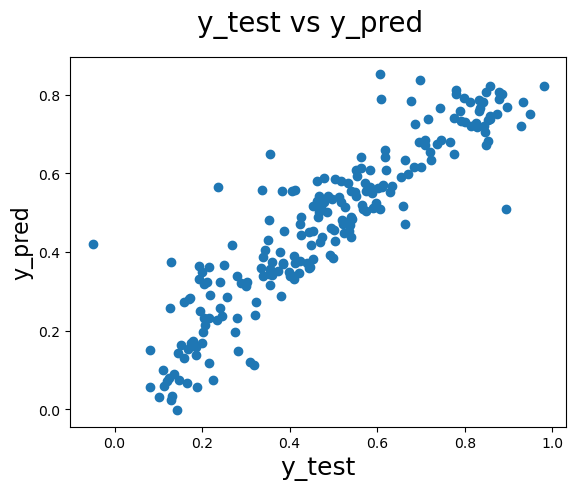

In [75]:
# plotting y_test and y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)

We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

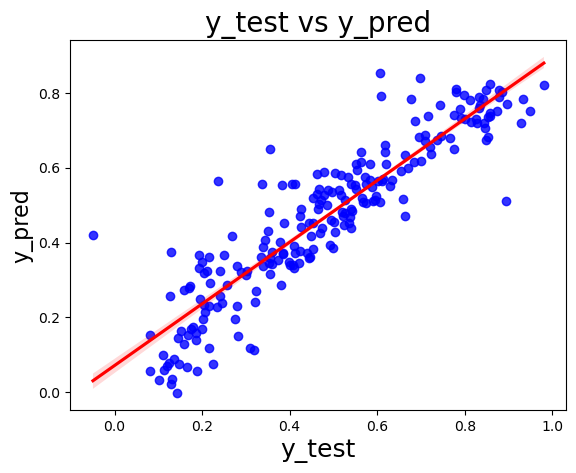

In [76]:
# visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [77]:
# function to plot actual vs predicted
# takes actual and predicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)           
    plt.xlabel('Index', fontsize=18)                               
    plt.ylabel('Counts', fontsize=16)                            

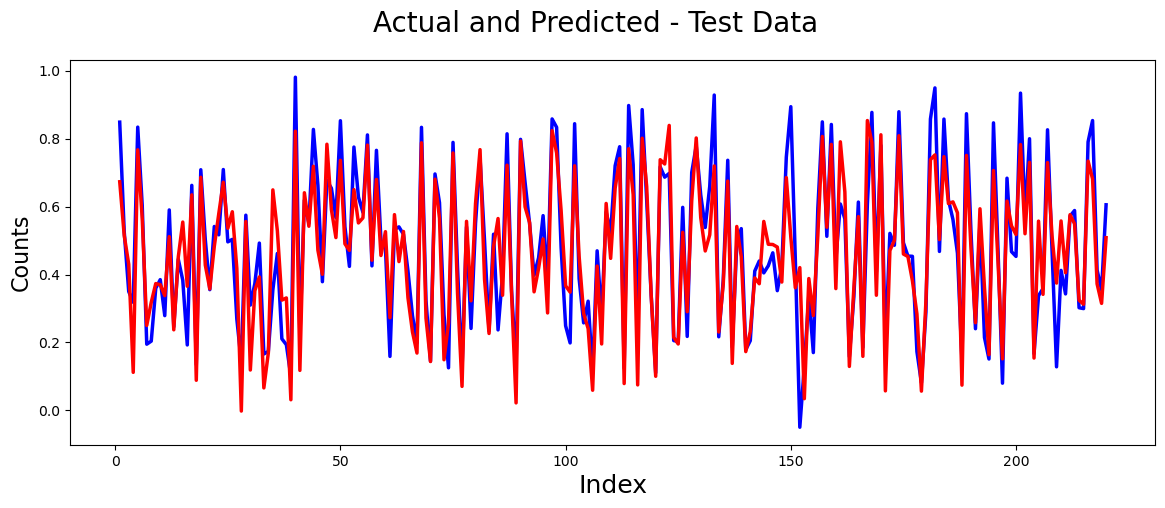

In [78]:
# plotting actual vs predicted for test Data
plot_act_pred(y_test,y_pred,len(y_test)+1,'Test Data')

As we can see predictions for test data is very close to actuals

In [79]:
# error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,221,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              
    plt.xlabel('Index', fontsize=18)                      
    plt.ylabel('Counts - Predicted Counts', fontsize=16)            

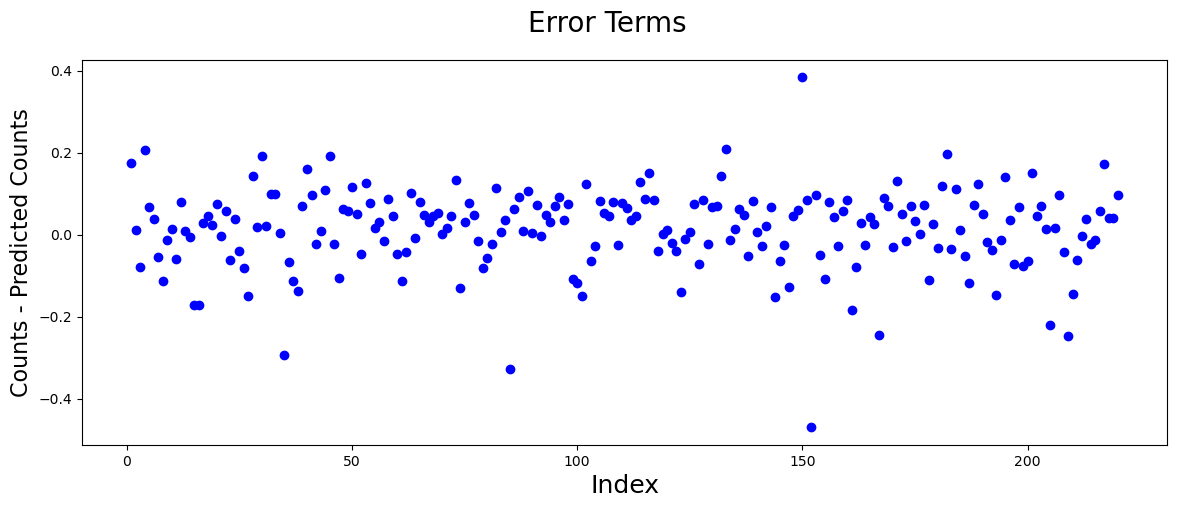

In [80]:
# plotting error terms for test data
plot_err_terms(y_test,y_pred)

As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

In [81]:
# finding out the mean squared error 
train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.00919722514118758
Mean squared error of the test set is 0.009844354607093242


Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets

## Conclusion

Significant variables to predict the demand for shared bikes
- temperature
- windspeed
- Season(Winter & Spring)
- months(March, July, September, November & December)
- Year
- weathersit( Light Snow & rain, Mist & Cloudy)

In [82]:
# printing features with their coefficient(weights) value from trained model
print(list(zip(lr.coef_, X_train_rfe.columns)))

[(0.2414155373391886, 'year'), (0.4122428344995343, 'temperature'), (-0.0936082412384643, 'windspeed'), (-0.1642549190544686, 'season_spring'), (0.08545384650012024, 'season_winter'), (-0.06746835052852908, 'month_dec'), (-0.054329194088992165, 'month_jul'), (0.057310601732108245, 'month_mar'), (-0.08526061959171856, 'month_nov'), (0.04741426520105962, 'month_sept'), (-0.2706336143541241, 'weathersit_light snow & rain'), (-0.08467556721404913, 'weathersit_mist_cloudy')]


Analysing the above model, the company should focus on the following features:
 - Company should focus on expanding business during Winter.
 - Company should focus on expanding business during March & September.
 - Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
 - We can conclude that the bike demands for the BoomBikes is company is dependent on the temperature and whether it is a workingday or not.

These interpretations help us derive meaningful insights in the bike rental market and the behaviour of the people. One of the recommendations based on this model are that there should be aggressive marketing in the summer and spring season to drive up rentals. Since the summer months also show low rental levels, a strong marketing strategy for the first 6 months of the year can assist in driving up the rental numbers. There has to be an approach required to introduce more users on days where the weather is less clear, perhaps with incentives or strategic deals. Rentals were more in 2019 than 2018 which suggests that over time more people would be exposed to this idea and there has to a strong analysis done to retain the repeat customers.